# Import and load data

In [50]:
from sklearn.metrics import accuracy_score
from sklearn import svm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Nombre d'images dans X_train : 50000 Nombre d'image dans X_test : 10000


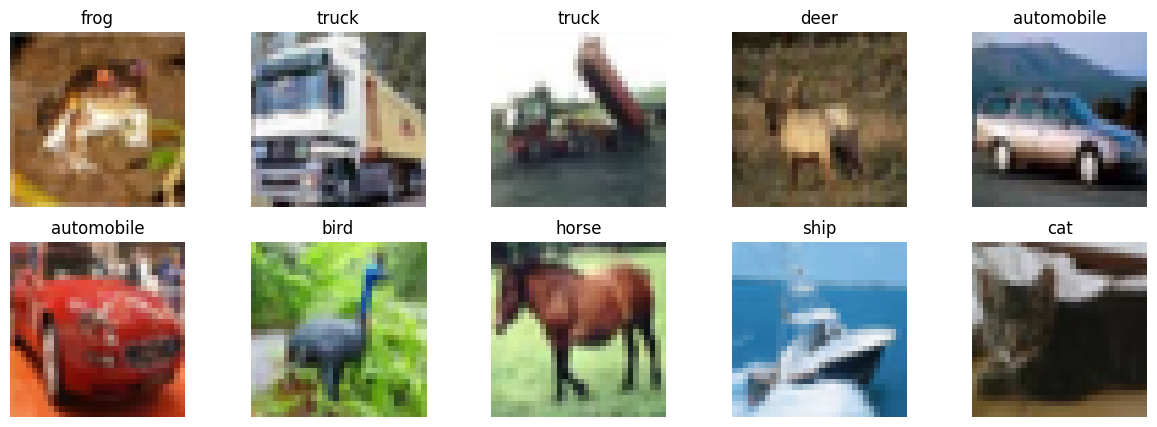

In [51]:

# Function to load a batch
def load_cifar10_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load all batches
data_batches = []
labels_batches = []
for i in range(1, 6):
    batch = load_cifar10_batch(Path.cwd().parent / 'data' / 'cifar-10-batches-py' / f'data_batch_{i}')
    data_batches.append(batch[b'data'])
    labels_batches.append(batch[b'labels'])

X_train = np.concatenate(data_batches)
y_train = np.concatenate(labels_batches)

# Load test batch
test_batch = load_cifar10_batch(Path.cwd().parent / 'data' / 'cifar-10-batches-py' / f'data_batch_{i}')
X_test = test_batch[b'data']
y_test = test_batch[b'labels']

# Reshape data to 32x32x3
X_train = X_train.reshape((len(X_train), 3, 32, 32)).transpose(0, 2, 3, 1)
X_test = X_test.reshape((len(X_test), 3, 32, 32)).transpose(0, 2, 3, 1)

# CIFAR-10 labels
cifar10_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

def plot_cifar10_images(images, labels, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(2, n // 2, i + 1)
        plt.imshow(images[i])
        plt.title(cifar10_labels[labels[i]])
        plt.axis('off')
    plt.show()
print("Nombre d'images dans X_train :",len(X_train), "Nombre d'image dans X_test :",len(X_test))
# Display first 10 images from the training set
plot_cifar10_images(X_train, y_train)


# SVM

In [58]:
# Select a number of images per label
def select_images_per_label(X, y, num_images=5):
    selected_images = []
    selected_labels = []
    for label in range(10):
        indices = np.where(y == label)[0][:num_images]
        selected_images.append(X[indices])
        selected_labels.append(y[indices])
    return np.concatenate(selected_images), np.concatenate(selected_labels)
# changer ici la valeur pour modifier le nombre d'images dans les données d'entrainement
X_train_selected, y_train_selected = select_images_per_label(X_train, y_train, 10)

def rgb2gray(images):
    return np.dot(images[...,:3], [0.2989, 0.5870, 0.1140])

X_train_gray = rgb2gray(X_train_selected)
X_test_gray = rgb2gray(X_test)

# Flatten images
X_train_flat = X_train_gray.reshape(len(X_train_gray), -1)
X_test_flat = X_test_gray.reshape(len(X_test_gray), -1)



<Figure size 1500x500 with 0 Axes>

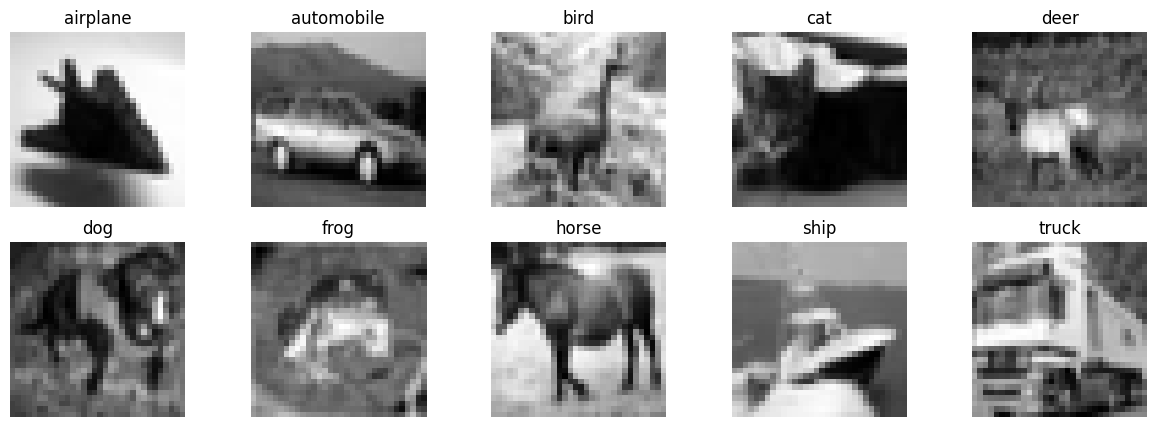

In [59]:
def plot_one_image_per_label(X, y, labels):
    unique_labels = np.unique(y)
    plt.figure(figsize=(15, 5))
    
    for i, label in enumerate(unique_labels):
        index = np.where(y == label)[0][0]  # Trouver l'index de la première occurrence de ce label
        image = X[index]
        
        plt.subplot(2, len(unique_labels) // 2, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(labels[label])
        plt.axis('off')
    
    plt.show()

# image de chaque label dans après le Gray scaling
plot_one_image_per_label(X_train_gray, y_train_selected, cifar10_labels)

In [53]:
# Train Linear SVM
linear_svm = svm.SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_flat, y_train_selected)
linear_train_pred = linear_svm.predict(X_train_flat)
linear_test_pred = linear_svm.predict(X_test_flat)

In [54]:
# Train RBF SVM
rbf_svm = svm.SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_flat, y_train_selected)
rbf_train_pred = rbf_svm.predict(X_train_flat)
rbf_test_pred = rbf_svm.predict(X_test_flat)

In [55]:
linear_train_accuracy = accuracy_score(y_train_selected, linear_train_pred)
linear_test_accuracy = accuracy_score(y_test, linear_test_pred)
rbf_train_accuracy = accuracy_score(y_train_selected, rbf_train_pred)
rbf_test_accuracy = accuracy_score(y_test, rbf_test_pred)


In [56]:
results = {
    'Model': ['Linear SVM', 'RBF SVM'],
    'Training Accuracy': [linear_train_accuracy * 100, rbf_train_accuracy * 100],
    'Test Accuracy': [linear_test_accuracy * 100, rbf_test_accuracy * 100]
}
for i in range(len(results['Model'])):
    print(f"Model: {results['Model'][i]}")
    print(f"Training Accuracy: {results['Training Accuracy'][i]:.2f}%")
    print(f"Test Accuracy: {results['Test Accuracy'][i]:.2f}%\n")

Model: Linear SVM
Training Accuracy: 100.00%
Test Accuracy: 18.13%

Model: RBF SVM
Training Accuracy: 88.00%
Test Accuracy: 20.12%

